In [51]:
library(ggplot2)
library(lattice)
set.seed(1896)

In [52]:
n_values <- c(4, 27, 70)
calc_means <- function(n) {
  means <- c()
  for (i in 1:500) {
    means <- c(means, mean(runif(n, 4, 8)))
  }
  return(means)
}

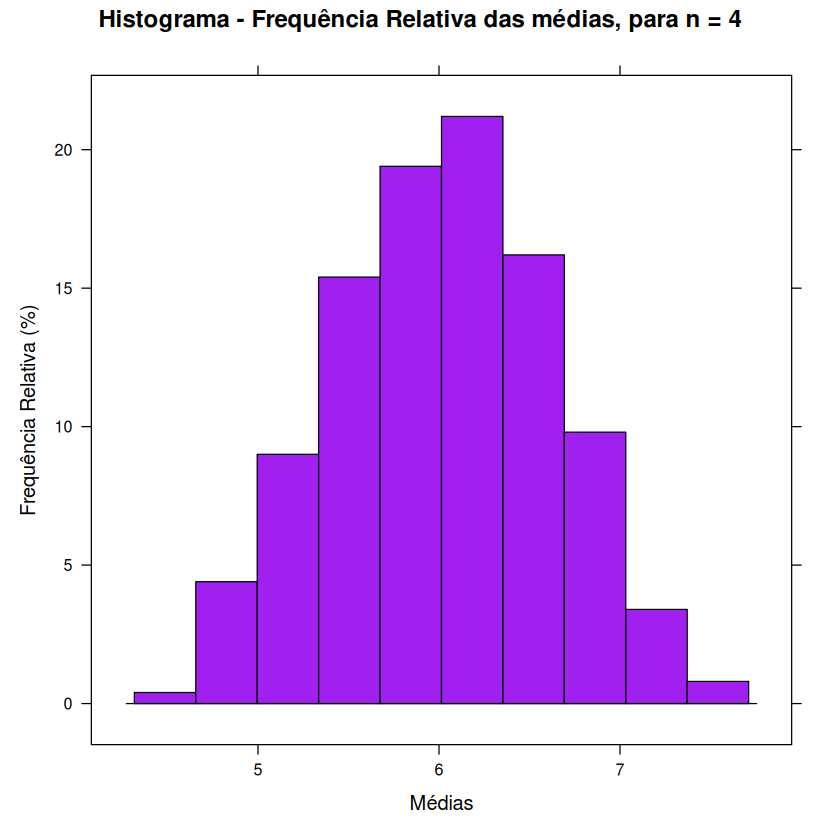

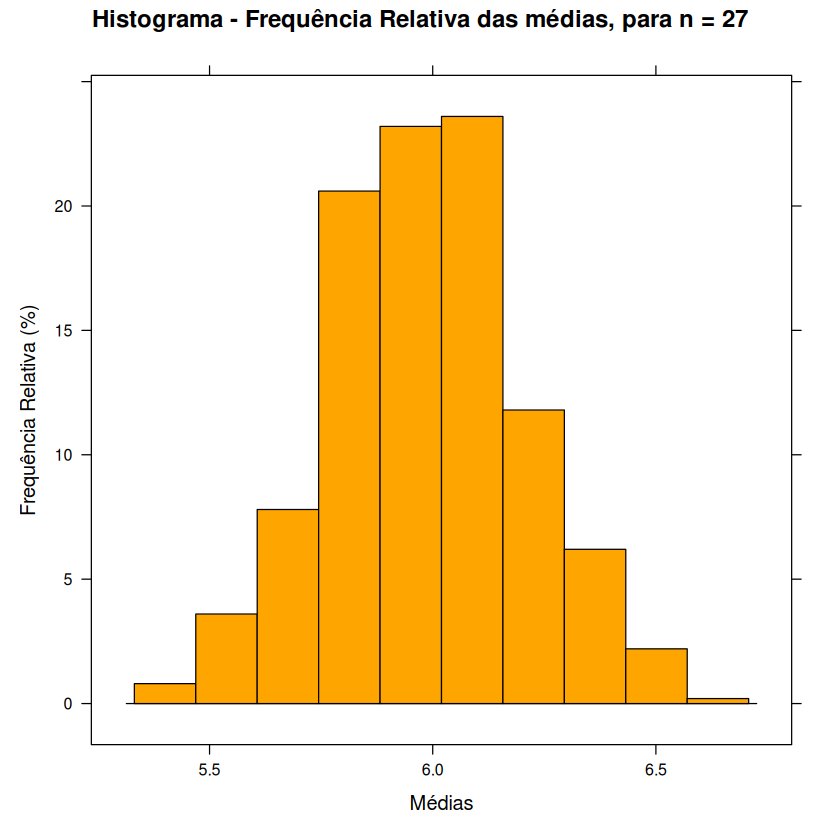

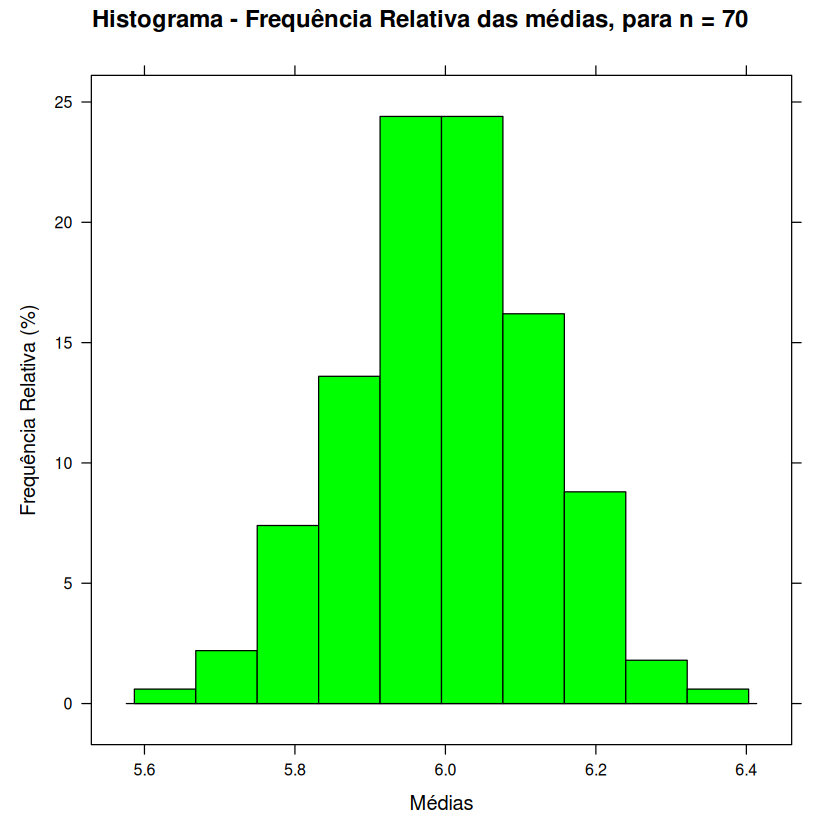

In [53]:
histogram(calc_means(n_values[1]), xlab="Médias", ylab="Frequência Relativa (%)", main="Histograma - Frequência Relativa das médias, para n = 4", col="purple")
histogram(calc_means(n_values[2]), xlab="Médias", ylab="Frequência Relativa (%)", main="Histograma - Frequência Relativa das médias, para n = 27", col="orange")
histogram(calc_means(n_values[3]), xlab="Médias", ylab="Frequência Relativa (%)", main="Histograma - Frequência Relativa das médias, para n = 70", col="green")